In [11]:
import os
import pandas as pd

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras

In [12]:
# project specific
from utils import data_handler
from utils.models import cnn_encoder

In [13]:
x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True)
#x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 0, retain_phases="2", return_filenames= True)

retained phase 2
loading samples...
loaded 5740 samples
number of genes selected :  6161


In [14]:
latent_dim = 64
t_shape = (6161)
print(t_shape)

autoencoder = cnn_encoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

6161


In [15]:
hist = autoencoder.fit(x_train, epochs=100, shuffle=False)

Epoch 1/100
45/45 [==============================] - 49s 1s/step - loss: 1407894.6576
Epoch 2/100
45/45 [==============================] - 55s 1s/step - loss: 1001945.8234
Epoch 3/100
45/45 [==============================] - 57s 1s/step - loss: 968871.7255
Epoch 4/100
45/45 [==============================] - 55s 1s/step - loss: 716863.3139
Epoch 5/100
45/45 [==============================] - 49s 1s/step - loss: 514442.6202
Epoch 6/100
45/45 [==============================] - 48s 1s/step - loss: 419664.8852
Epoch 7/100
45/45 [==============================] - 59s 1s/step - loss: 370605.1447
Epoch 8/100
45/45 [==============================] - 59s 1s/step - loss: 339261.9803
Epoch 9/100
45/45 [==============================] - 55s 1s/step - loss: 318049.7188
Epoch 10/100
45/45 [==============================] - 62s 1s/step - loss: 300112.4039
Epoch 11/100
45/45 [==============================] - 56s 1s/step - loss: 281927.1135
Epoch 12/100
45/45 [==============================] - 60s 1s/

In [8]:
e = iter(x_train).next()

In [9]:
z = autoencoder.encoder(e)
autoencoder.decoder(z)

<tf.Tensor: shape=(22, 5257), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

[1188348.75, 946906.6875, 883796.3125, 638768.25, 482315.71875, 403149.25, 357394.0, 328502.09375, 305864.84375, 287452.0625, 266403.15625, 252978.671875, 229159.25, 236902.75, 293389.9375, 229193.015625, 207590.171875, 208913.703125, 209363.421875, 282245.625, 187396.90625, 150685.359375, 146908.484375, 136450.484375, 146387.59375, 196551.421875, 207067.1875, 193026.09375, 150136.78125, 172216.421875, 192640.484375, 228816.921875, 172839.65625, 142000.078125, 130219.5078125, 127134.859375, 131253.8125, 126075.8046875, 115890.0703125, 119033.6015625, 140129.5, 155573.546875, 153240.671875, 137197.53125, 146659.296875, 164056.96875, 194008.1875, 196849.796875, 139113.875, 135691.640625, 119219.3203125, 152934.765625, 157028.296875, 193140.96875, 168660.34375, 192952.953125, 226522.765625, 239812.28125, 206788.6875, 248561.1875, 254594.71875, 236479.9375, 191398.671875, 153513.90625, 109576.671875, 79996.2421875, 69649.1796875, 69264.3515625, 69927.6875, 67708.203125, 65434.26953125, 661

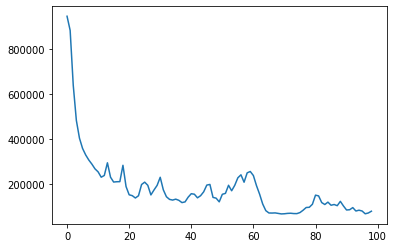

In [16]:
plt.plot(hist.history['loss'][1:])
print(hist.history['loss'])


In [17]:
autoencoder.encoder.save('../workfiles/cnn_autoencoer_model')


INFO:tensorflow:Assets written to: ../workfiles/cnn_autoencoer_model/assets


INFO:tensorflow:Assets written to: ../workfiles/cnn_autoencoer_model/assets


In [18]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

45/45 [==============================] - 2s 45ms/step


In [19]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [20]:
df.to_csv("../workfiles/compressed_data_cnn_autoencoder_phase_2.csv")
